In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


train_image_data = pd.read_csv('features.csv')
print(train_image_data.size)

# Load the metadata file and concatenate it with the image data by id

metadata = pd.read_csv('train.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
train_data = pd.merge(train_image_data, metadata.drop('Pawpularity', axis=1), on='Id', how='outer')
train_data.head()


446040


,Id,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,...,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0007de18844b0dbbb5e1f607da0606e0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,...,1,1,0,0,1,0,0,0,0,0
1,0009c66b9439883ba2750fb825e1d7db,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,...,1,0,0,0,0,0,0,0,0,0
2,0013fd999caf9a3efe1352ca1b0d937e,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,...,1,1,0,0,0,0,1,1,0,0
3,0018df346ac9c1d8413cfcc888ca8246,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,...,1,1,0,0,0,0,0,0,0,0
4,001dc955e10590d3ca4673f034feeef2,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,...,0,1,0,0,1,0,0,0,0,0


In [2]:
train_data.columns

Index(['Id', 'gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2',
       'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7',
       'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12',
       'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green',
       'mean_blue', 'variance_red', 'variance_green', 'variance_blue',
       'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31',
       'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35',
       'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19',
       'Pawpularity', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action',
       'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [3]:
X = train_data.drop('Id', axis=1).drop('Pawpularity', axis=1) #except the last and the first(Id)
y = train_data['Pawpularity']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train
X_val = X_val

# Print the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (7929, 55)
y_train shape: (7929,)
X_val shape: (1983, 55)
y_val shape: (1983,)


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\4022925016.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


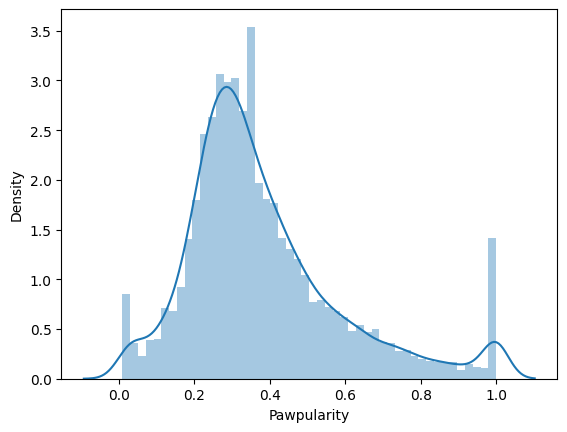

Total number of outliers:  221


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\4022925016.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(of_y_train)


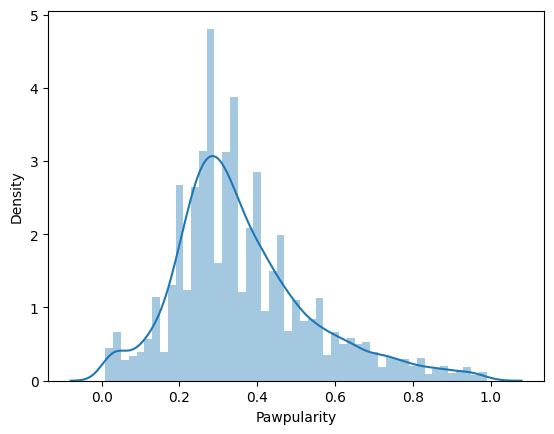

Mean before outlier removal: 0.38036196241644593
Standard deviation before outlier removal: 0.2048104984883986
Mean after outlier removal: 0.3625960041515309
Standard deviation after outlier removal: 0.17839826539114023


In [4]:
from scipy.stats import zscore
# Remove the outliers from the training set

# Plot the target variable distribution
sns.distplot(y_train)
plt.show()

# Identify the outliers
outliers = [x for x in y_train if x >= 1]
print("Total number of outliers: ", len(outliers))

# Remove the outliers from the features
of_X_train = X_train[y_train < 1]

# Remove the outliers
of_y_train = y_train[y_train < 1]

# Plot the target distribution again to see if the outliers have been removed
sns.distplot(of_y_train)
plt.show()

# Print statistics before and after removing the outliers
print("Mean before outlier removal:", np.mean(y_train))
print("Standard deviation before outlier removal:", np.std(y_train))
print("Mean after outlier removal:", np.mean(of_y_train))
print("Standard deviation after outlier removal:", np.std(of_y_train))

# Linear Regression

In [5]:
## Using the whole training data
from sklearn.feature_selection import RFE

ftrs = []
rmse_list_lr = []
r2_list = []

for i in range(1, len(X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(X_train, y_train)

    # Selected features' names
    print(X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(X_train, y_train)
    #get the selected features
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list.append(r2_score(y_val, y_pred))

    ftrs.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Index(['haralick_3'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_3'], dtype='object')
Coefficients: [6.63731244e-07]
Mean squared error: 0.21025
Coefficient of determination: -0.00001
Index(['haralick_3', 'haralick_6'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-4.69728589e-05  1.24313759e-05]
Mean squared error: 0.20985
Coefficient of determination: 0.00381
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [ 1.59909739e+08 -6.39638956e+08  1.59909739e+08]
Mean squared error: 0.20987
Coefficient of determination: 0.00358
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [ 1.77687069

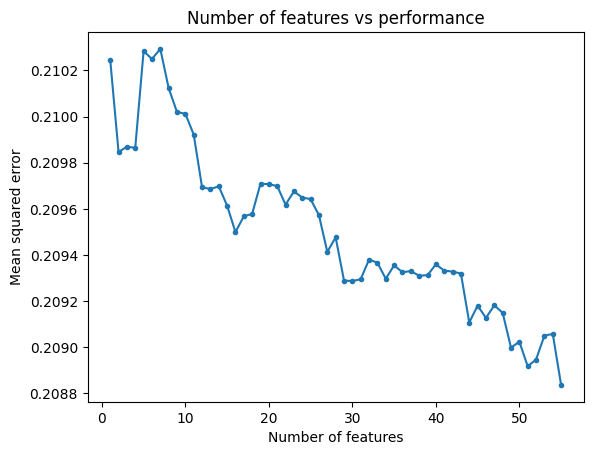

In [6]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns)+1), rmse_list_lr, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [7]:
from sklearn.feature_selection import RFE

ftrs = []
rmse_list_lr_of = []
r2_list = []

for i in range(1, len(of_X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(of_X_train, of_y_train)

    # Selected features' names
    print(of_X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(of_X_train, of_y_train)
    #get the selected features
    selected_features = of_X_train.columns[rfe.support_]
    model.fit(of_X_train[selected_features], of_y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr_of.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list.append(r2_score(y_val, y_pred))

    ftrs.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Index(['haralick_3'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_3'], dtype='object')
Coefficients: [5.26642977e-07]
Mean squared error: 0.21101
Coefficient of determination: -0.00725
Index(['haralick_3', 'haralick_6'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-3.57911248e-05  9.47688026e-06]
Mean squared error: 0.21067
Coefficient of determination: -0.00406
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [ 1.64981275e+08 -6.59925101e+08  1.64981275e+08]
Mean squared error: 0.21069
Coefficient of determination: -0.00418
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [ 1.581180

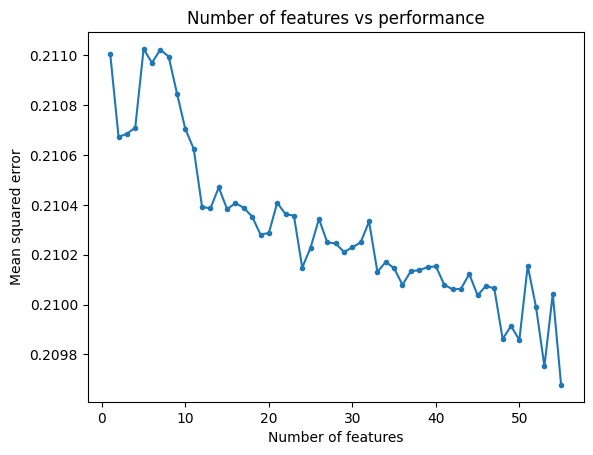

In [8]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns) +1), rmse_list_lr_of, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [9]:
# Get the features that give lowest rmse
best = np.argmin(rmse_list_lr_of)
print(f"Best number of features: {best+1}")

Best number of features: 55


# SVR model

In [11]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ftrs = []
rmse_list = []
r2_list = []
estimators = []

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}


# Perform grid search on scaled data
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator}")
print(f"Best parameters: {best_params}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)
rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)
estimators.append(best_estimator)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   7.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   7.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   7.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.016 total time=   7.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   7.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.013 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.004 total time=   1.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.002 total time=   1.2s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.006 total time=   1.3s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.019 total time=   1.2s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.031 total time=   1.5s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [12]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.20992
Coefficient of determination: 0.00311


In [13]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ftrs = []
rmse_list = []
r2_list = []
estimators = []

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(of_X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

# Perform grid search on scaled data
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, of_y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator}")
print(f"Best parameters: {best_params}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)
rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)
estimators.append(best_estimator)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   6.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   6.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   6.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   6.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.021 total time=   6.8s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.005 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.008 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.002 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.003 total time=   1.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.011 total time=   1.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.013 total time=   1.5s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [14]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21105
Coefficient of determination: -0.00764


# Decision tree Regressor

In [63]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=4))

In [64]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Mean squared error: 0.21017
Coefficient of determination: 0.00072


In [65]:
# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(of_X_train, of_y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 8},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=6, min_samples_split=8))

In [66]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21067
Coefficient of determination: -0.00402


# Random Forest Regressor

In [16]:
## Using the whole training data
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)


print(f"Selected Features: {i}")
# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Selected Features: 55
Mean squared error: 0.21123
Coefficient of determination: -0.00937


In [17]:
## Using the whole training data

# Train the model
model = RandomForestRegressor()
model.fit(of_X_train, of_y_train)

# Make predictions
y_pred = model.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)


print(f"Selected Features: {i}")
# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Selected Features: 55
Mean squared error: 0.21056
Coefficient of determination: -0.00301


Selected Features: Index(['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3',
       'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8',
       'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation',
       'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red',
       'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27',
       'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100',
       'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92',
       'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near',
       'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion',
       'Info'],
      dtype='object')
Coefficients: [-6.09685687e-04 -2.57692196e-01  2.12067914e+08  8.05972858e-02
 -8.48271655e+08  1.05934849e-01 -1.46725803e-03  2.12067914e+08
 -5.90029235e-02  5.14034678e-02  1.26114366e+02  1.58152851e-02
 -3.74456880e-02  6.38890303e-01 -7.33861545e-0

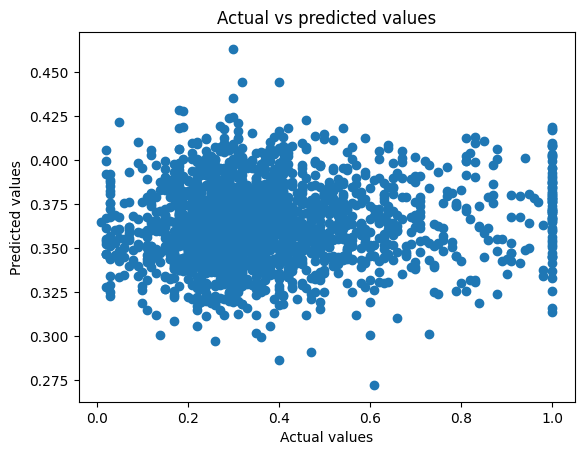

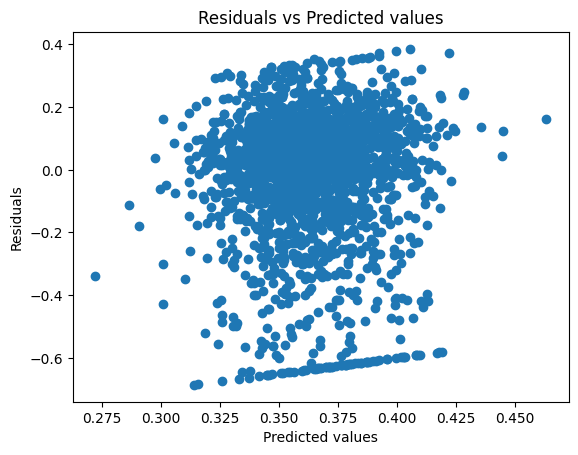

In [38]:
# Train the model using the best number of features and best features selected by RFE
model = LinearRegression()
model.fit(of_X_train[ftrs[best]], of_y_train)

# Make predictions using the validation set
y_pred = model.predict(X_val[ftrs[best]])

# Display the metrics of the best model
print(f"Selected Features: {ftrs[best]}")
print(f"Coefficients: {model.coef_}")
print('Root Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs predicted values')
plt.show()

# Plot the residuals
plt.scatter(y_pred, y_pred - y_val)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

In [39]:
# Perform cross validation on the training set
from sklearn.model_selection import cross_val_score

X = train_data.iloc[:, 1:-1].drop('Pawpularity', axis=1)
y = train_data['Pawpularity']

# Test the model with cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross validation scores:  [ 0.00677941  0.01156107  0.0082904   0.00334108 -0.00631809]
Average cross-validation score:  0.004730776008093529


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Create SVR model
svr_model = SVR()

# Create StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

# Perform grid search on scaled data
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_